# Problem Set 1

## John Wilson

July 19, 2017

In [1]:
# Import some necessary libraries

import numpy as np
import scipy.optimize as opt
import scipy.linalg as la
from numba import jit
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

### Problem 1

In trying to solve for the correct value of A, first let $K_{t+1} = Ae^{z_t}K_t^{\alpha}$ and plug this into equation (60). Observe that for this specific form of $K_{t+1}$, the expected value loses uncertainty and reduces to $\frac{\alpha}{e^{z_t}K_t^{\alpha}A(1-A)}$. Then the expression can be solved for A, yielding $A = \alpha \beta$. Plugging this back into equation 60 yields an equality, so it is the correct value.

### Problem 2

Characterizing equations are as follows:
$$ c_t = (1 - \tau) [w_t \mathscr{l}_t + (r_t - \delta) k_t] + k_t + T_t - k_{t+1} $$
$$ \frac{1}{c_t} = \beta E_t \left\lbrace \frac{1}{c_{t+1}}[(r_{t+1} - \delta)(1-\tau)+1] \right\rbrace $$
$$ a \frac{1}{1-l_t} = \frac{w_t(1-\tau)}{c_t}$$
$$r_t=\alpha e^{z_t} \left( \frac{K_t}{L_t} \right)^{\alpha-1}$$
$$w_t = (1-\alpha) e^{z_t} \left( \frac{K_t}{L_t} \right)^{\alpha}$$
$$ \tau [w_t\mathscr{l}_t + (r_t - \delta) k_t] = T_t $$
$$ z_t = (1 - \rho)\overline{z} + \rho z_{t-1} + \epsilon_t^2 $$

You could solve this using the same tricks as for problem 1, although your ansatz (initial guess as to the functional form) might need to be different. As long as there exists a closed form solution, if you can guess the right form, you can solve for the parameters in the same way as before.

### Problem 3

Characterizing equations are as follows:

$$c_t = (1 - \tau)[w_t \mathscr{l}_t + (r_t - \delta) k_t ] + k_t + T_t - k_{t+1} $$ 

$$c_t^{-\gamma} = \beta E_t \{ c_t^{-\gamma} [(r_{t+1} - \delta)(1-\tau) + 1 ]\} $$

$$ - \frac{a}{\mathscr{l}_t - 1} = c_t^{-\gamma} w_t (1 - \tau) $$

$$r_t = e^{z_t} \alpha K_t^{\alpha - 1} L_t ^ {1 - \alpha}$$

$$w_t = e^{z_t} (1 - \alpha) K_t^{\alpha} L_t ^ {- \alpha}$$

$$\tau[w_t \mathscr{l}_t + (r_t - \delta) k_t] = T_t$$

$$z_t = (1 - \rho_z) \overline{z} + \rho_z z_{t-1} + \epsilon_t^z$$

### Problem 4

Characterizing equations are as follows:
$$ c_t = (1 - \tau) [w_t \mathscr{l}_t + (r_t - \delta) k_t] + k_t + T_t - k_{t+1} $$

$$ c_t^{- \gamma} = \beta E_t[ c_t^{- \gamma} (( r_{t+1} - \delta )(1 - \tau) + 1)] $$

$$ a(1 - \mathscr{l}_t)^{- \xi} = c_t^{- \gamma} w_t (1 - \tau) $$

$$ r_t = e^{z_k} \alpha [\alpha K_t^{\eta} + (1 - \alpha) L_t^{\eta}]^{\frac{1}{\eta}-1} K_t^{\eta - 1} $$

$$ w_t = e^{z_k} (1 - \alpha) [\alpha K_t^{\eta} + (1 - \alpha) L_t^{\eta}]^{\frac{1}{\eta}-1} L_t^{\eta - 1} $$

$$ \tau [w_t\mathscr{l}_t + (r_t - \delta) k_t] = T_t $$

$$ z_t = (1 - \rho)\overline{z} + \rho z_{t-1} + \epsilon_t^2 $$

### Problem 5

Characterizing equations are as follows:

$$c_t = (1 - \tau)[w_t \mathscr{l}_t + (r_t - \delta) k_t ] + k_t + T_t - k_{t+1} $$ 

$$c_t^{-\gamma} = \beta E_t \{ c_t^{-\gamma} [(r_{t+1} - \delta)(1-\tau) + 1 ]\} $$

$$ 0 = c_t^{-\gamma} w_t (1 - \tau) $$

$$r_t = \alpha K_t^{\alpha - 1} e^{z_t(1 - \alpha)}$$

$$w_t = 0$$

$$\tau[w_t \mathscr{l}_t + (r_t - \delta) k_t] = T_t$$

$$z_t = (1 - \rho_z) \overline{z} + \rho_z z_{t-1} + \epsilon_t^z$$

In [2]:
beta = 0.98
delta = 0.10
tao = 0.05
alpha = 0.40
def k(b, d, t, a):
    numerator = 1 + b * d * (1 - t) - b
    denom = b * a * (1 - t)
    frac = numerator / denom
    return frac ** (1 / (a-1))
kv = k(beta, delta, tao, alpha)
r = kv ** (alpha - 1) * alpha
T = tao * (r - delta) * kv
c = (1-tao) * (r - delta) * kv + T
I = delta * kv
F = kv ** alpha
print("ALGEBRAIC SOLUTIONS:")
print("k= ",kv)
print("r= ",r)
print("T= ",T)
print("c= ",c)
print("Production= ", F)
print("Investment= ", I)

ALGEBRAIC SOLUTIONS:
k=  7.287497950692992
r=  0.12148227712137485
T=  0.007827602524911907
c=  0.15655205049823817
Production=  2.2132546139188434
Investment=  0.7287497950692993


In [3]:
# Initialize needed parameters for the system of equations

gamma = 2.5
beta = 0.98
alpha = 0.4
delta = 0.1
z_bar = 0
tao = 0.05

In [4]:
def f1(inputs, params):
    c, r, k, T = inputs
    gamma, beta, alpha, delta, z_bar, tao = params
    diff1 = c - (1 - tao) * (r - delta) * k - T
    diff2 = c ** (-gamma) - beta * c ** (-gamma) * ((r - delta) * (1 - tao) + 1)
    diff3 = r - alpha * (k ** (alpha - 1)) * np.exp(z_bar) ** (1 - alpha)
    diff4 = tao * (r - delta) * k - T
    diff_vec = np.array([diff1, diff2, diff3, diff4])
    return la.norm(diff_vec)

In [5]:
c_init = 1
r_init = 1
k_init = 1
t_init = 1

In [6]:
init_vec = np.array([c_init, r_init, k_init, t_init])
params = [gamma, beta, alpha, delta, z_bar, tao]
bounds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None))
results1 = opt.minimize(f1, init_vec, args = params, method = 'L-BFGS-B',
                      bounds = bounds)
print("Numerically computed values for c, r, k, and T, respectively, are ",results1.x.tolist())

Numerically computed values for c, r, k, and T, respectively, are  [0.1565521665561183, 0.12148227324014828, 7.287503081828845, 0.007827513479331947]


These numerically computed values are the same as those which were computed analytically. Thus computational methods are in this case both easier and equally accurate.

### Problem 6

Characterizing equations are as follows:
$$ c_t = (1 - \tau) [w_t \mathscr{l}_t + (r_t - \delta) k_t] + k_t + T_t - k_{t+1} $$
$$ c_t^{- \gamma} = \beta E_t[ c_t^{- \gamma} (( r_{t+1} - \delta )(1 - \tau) + 1)] $$
$$ a(1 - \mathscr{l}_t)^{- \xi} = c_t^{- \gamma} w_t (1 - \tau) $$
$$ r_t = \alpha K_t^{\alpha - 1} (L_te^{z_t})^{1 - \alpha} $$
$$ w_t = K_t^{\alpha}L_t^{-\alpha}e^{z_t(1 - \alpha)}(1 - \alpha) $$
$$ \tau [w_t\mathscr{l}_t + (r_t - \delta) k_t] = T_t $$
$$ z_t = (1 - \rho)\overline{z} + \rho z_{t-1} + \epsilon_t^2 $$

In [7]:
# Initialize needed parameters for the system of equations

xi = 1.5
a = 0.5

In [8]:
def f2(inputs, params):
    c, w, l, r, k, T = inputs
    gamma, xi, beta, alpha, a, delta, z_bar, tao = params
    diff1 = c - (1 - tao) * (w * l + (r - delta) * k) - T
    diff2 = c ** (-gamma) - beta * c ** (-gamma) * ((r - delta) * (1 - tao) + 1)
    diff3 = a * ((1 - l) ** (-xi)) - (c ** (-gamma)) * w * (1 - tao)
    diff4 = r - alpha * (k ** (alpha - 1)) * (l * np.exp(z_bar)) ** (1 - alpha)
    diff5 = w - k ** alpha * l ** (-alpha) * np.exp(z_bar * (1 - alpha)) * (1 - alpha)
    diff6 = tao * (w * l + (r - delta) * k) - T
    diff_vec = np.array([diff1, diff2, diff3, diff4, diff5, diff6])
    return la.norm(diff_vec)

In [9]:
w_init = 1
l_init = 1
init_vec = np.array([c_init, w_init, l_init, r_init, k_init, t_init])
params = [gamma, xi, beta, alpha, a, delta, z_bar, tao]
bounds = ((1e-10, None), (1e-10, None), (1e-10, .99), (1e-10, None), (1e-10, None), (1e-10, None))
results = opt.minimize(f2, init_vec, args = params, method = 'L-BFGS-B',
                      bounds = bounds)

In [10]:
c_bar, w_bar, l_bar, r_bar, k_bar, t_bar = results.x
ss_out = k_bar ** alpha * (l_bar * np.exp(z_bar)) ** (1 - alpha)
ss_inv = delta * k_bar
print("c_bar: ", c_bar)
print("w_bar: ", w_bar)
print("l_bar: ", l_bar)
print("r_bar: ", r_bar)
print("k_bar: ", k_bar)
print("T_bar: ", t_bar)
print("Steady state output: ", ss_out)
print("Steady state investment: ", ss_inv)

c_bar:  0.86070186772
w_bar:  1.32794919332
l_bar:  0.579791770705
r_bar:  0.121482484081
k_bar:  4.22520411051
T_bar:  0.043035060947
Steady state output:  1.28322350362
Steady state investment:  0.422520411051


### Problem 8

In [11]:
def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.

    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process

    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu -(num-1)/2*step, mu +(num-1)/2*step, num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2], \
                    [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)], \
                    [(1-p)**2, (1-p)*q, q**2]]).T


    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p * np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
                + (1 - p) * np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
                + (1 - q) * np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
                + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.


    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp

In [12]:
# Initialize parameters
alpha = 0.35
beta = 0.98
rho = 0.9
mu = 0
sigma = 0.02
A = alpha * beta
K_bar = A ** (1 / (1 - alpha))
pi, z_grid = rouwen(rho, mu, 5 * sigma / 12, 25)
k_grid = np.linspace(.5 * K_bar, 1.5 * K_bar, 25)
sizek = 25

In [13]:
# firm cash flow, e
@jit
def e(z_grid, sizek, alpha, k_grid):
    e = np.zeros((len(z_grid),sizek, sizek))
    for h in range(len(z_grid)): #z_grids
        for i in range(sizek): #k values
            for j in range(sizek): # k t+1
                    e[h, i, j] = np.log( np.exp(z_grid[h]) * k_grid[i] ** alpha - k_grid[j])
    return e

@jit
def find_vmat(V,ez,sizek,z_grid,beta):
    Vmat = np.zeros((len(z_grid), sizek, sizek))  # initialize Vmat matrix
    for i in range(sizek):  # loop over k
        for j in range(sizek):  # loop over k'
            for k in range(len(z_grid)):
                Vmat[k, i, j] = ez[k, i, j] + beta * V[k][j]
    return Vmat

In [14]:
VFtol = 1e-6
VFmaxiter = 3000
V = np.zeros((len(z_grid),sizek))  # initial guess at value function
PF = np.zeros((len(z_grid),sizek))
Vstore = np.zeros((sizek, VFmaxiter))  # initialize Vstore array
start_time = time.clock()
VFdist = 7.0
VFiter = 1
ez=e(z_grid, sizek, alpha, k_grid)
while VFdist > VFtol and VFiter < VFmaxiter:
    TV = np.copy(V)
    Vmat=find_vmat(V,ez,sizek,z_grid,beta)
    for l in range(len(z_grid)):
        weights = pi[l]
        Vmat1 = np.average(Vmat,axis=0,weights=weights)
        Vstore[:, VFiter] = V[l].reshape(sizek,)  # store value function at each
        # iteration for graphing later
        V[l] = Vmat1.max(axis=1)  # apply max operator to Vmat (to get V(k))
        PF[l] = np.argmax(Vmat1, axis=1)  # find the index of the optimal k'
    VFdist = (np.absolute(V - TV)).max()  # check distance between value
    # function for this iteration and value function from past iteration
    VFiter += 1

VFI_time = time.clock() - start_time
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')
print('VFI took ', VFI_time, ' seconds to solve')
print("VFdist was ", VFdist)


VF = V  # solution to the functional equation

Value function converged after this many iterations: 693
VFI took  1.8592637765525015  seconds to solve
VFdist was  9.97651213197e-07


<IPython.core.display.Javascript object>


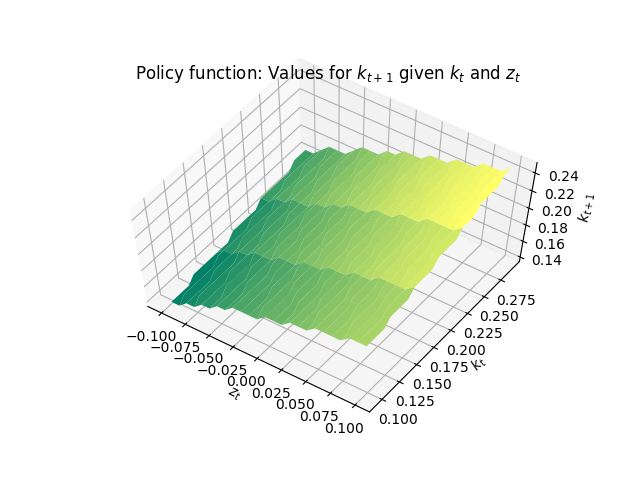

In [16]:
cmap1 = cm.get_cmap('summer')
kprime = np.zeros((25,25))
for z_ind in range(len(z_grid)):
    for k_ind in range(len(k_grid)):
        kprime[z_ind, k_ind] = k_grid[int(PF[z_ind,k_ind])]
z_mesh, k_mesh = np.meshgrid(z_grid, k_grid)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(z_mesh, k_mesh, kprime, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Policy function: Values for $k_{t+1}$ given $k_t$ and $z_t$')
ax.set_xlabel(r'$z_t$')
ax.set_ylabel(r'$k_t$')
ax.set_zlabel(r'$k_{t+1}$')